# ЛАБА 2


## задание 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as st
import seaborn as sb

In [4]:
n=13
a=-3
sigma=3
gamma=0.9

In [5]:
X = np.random.normal(a,sigma,size = n)

print(X)

[ 0.09967529 -2.24353502 -5.80510107 -3.42129262 -1.94212596 -6.43234003
 -6.27004603 -4.71330135  4.58451331 -4.78933867 -2.70191762 -3.96274989
 -4.30576837]


## Дисперсия известна

### Вручную

In [6]:
P_=1/2+gamma/2
print(P_)
t_gamma=st.norm.ppf(P_, loc=0, scale=1)
a_left_ =X.mean()-sigma*t_gamma/n**0.5
a_right_=X.mean()+sigma*t_gamma/n**0.5
print('доверительный интервал для параметра a')
(a_left_,a_right_)

0.95
доверительный интервал для параметра a


(-4.591933869458538, -1.8547319805632534)

### Методами Питона

In [7]:
a_estimate=np.mean(X)
interval_estimate_1=st.norm.interval(gamma, loc=a_estimate, scale=sigma/np.sqrt(n)) 
print(interval_estimate_1)

(-4.591933869458538, -1.8547319805632534)


## Дисперсия не известна

### Вручную

In [8]:
t_gamma=st.t.ppf(P_, df=len(X)-1)
a_estimate=np.mean(X)
sigma_estimate=np.std(X, ddof=1)
print(a_estimate, sigma_estimate)

a_left_=a_estimate-sigma_estimate*t_gamma/np.sqrt(n)
a_right_=a_estimate+sigma_estimate*t_gamma/np.sqrt(n)
print(a_left_, a_right_)

-3.2233329250108955 2.993797777532998
-4.703219942382606 -1.7434459076391844


### Методами Питона

In [9]:
a_left, a_right =st.t.interval(gamma, df=len(X)-1, loc=a_estimate, scale=st.sem(X,ddof=1)) 
print(a_left, a_right)

-4.703219942382607 -1.7434459076391844


## Для дисперсии

In [ ]:
# alpha = 1 - gamma #0.1
# diff = np.sum((X - a) ** 2) 
 
# chi2_lower = st.chi2.ppf(1 - alpha / 2, df = n)  #0.95
# chi2_upper = st.chi2.ppf(alpha / 2, df = n)  #0.05
 
# interval_left = diff / chi2_lower 
# interval_right = diff / chi2_upper 
 
# (interval_left, interval_right)

In [11]:
diff = np.sum((X - a) ** 2) 
 
chi_left, chi_right = st.chi2.interval(gamma, df = n) 
 
interval_left = diff / chi_right 
interval_right = diff / chi_left 
 
(interval_left, interval_right)

(4.838661707440499, 18.36469818911635)

## ЗАДАНИЕ 2


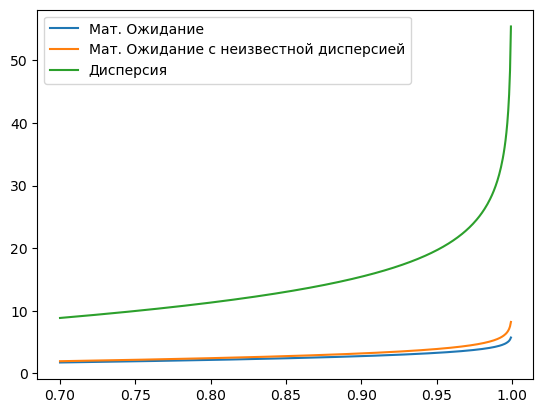

In [12]:
sample = np.random.normal(a, sigma, n)
a_estimate=np.mean(sample)
diff = np.sum((sample - a_estimate) ** 2) 
V=500
gamma_=[0.0]*V
delta_=[0.0]*V
gamma__0=0.7
gamma__1=0.9999999999
h=(gamma__1-gamma__0)/V

for i in range(V):
    gamma_[i]=gamma__0+i*h
    interval_estimate_MX= st.norm.interval(gamma_[i], loc=a_estimate, scale=sigma/np.sqrt(n)) 
    delta_[i]=interval_estimate_MX[1]-interval_estimate_MX[0]
plt.plot(gamma_,delta_, label="Мат. Ожидание")

for i in range(V):
    gamma_[i]=gamma__0+i*h
    a_left, a_right =st.t.interval(gamma_[i], df=len(sample)-1, loc=a_estimate, scale=st.sem(sample,ddof=1)) 
    delta_[i]=a_right-a_left
plt.plot(gamma_,delta_, label="Мат. Ожидание с неизвестной дисперсией")

for i in range(V):
    gamma_[i]=gamma__0+i*h
    chi_left, chi_right = st.chi2.interval(gamma_[i], df = n) 
    interval_left = diff / chi_right 
    interval_right = diff / chi_left
    delta_[i]=interval_right-interval_left
plt.plot(gamma_,delta_, label="Дисперсия")
plt.legend()

## ЗАДАНИЕ 3


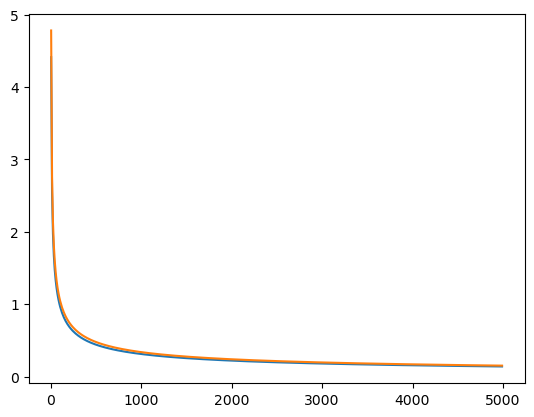

In [13]:
sample = np.random.normal(a, sigma, n) 
a_estimate = np.mean(sample) 
 
V = 500 # кол-во значений объема выборки 
count = [0.0] * V # объем 
delta_ = [0.0] * V # длина  
low = 5 
great = 5000 
h = (great - low) / V 
for i in range(V): 
    count[i] = low + i * h 
    interval_estimate_MX = st.norm.interval( confidence = gamma,  loc = a_estimate,  scale = sigma / np.sqrt(count[i]))  
    delta_[i] = interval_estimate_MX[1] - interval_estimate_MX[0] 
plt.plot(count,delta_, label="Мат. Ожидание")

for i in range(V): 
    count[i] = low + i * h 
    a_left, a_right =st.t.interval(confidence = gamma, df=len(sample)-1, loc=a_estimate, scale=sigma / np.sqrt(count[i])) 
    delta_[i]=a_right-a_left
plt.plot(count,delta_, label="Мат. Ожидание с неизвестной дисперсией")



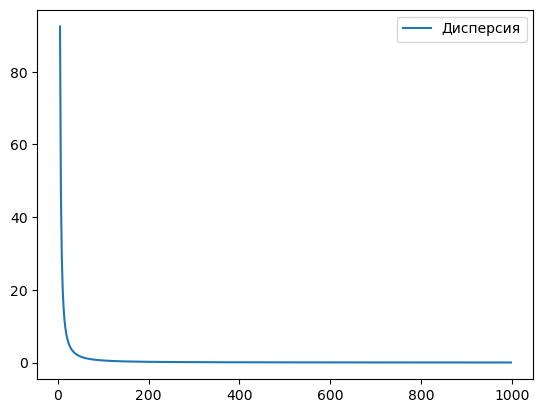

In [14]:
V = 500 # кол-во значений объема выборки 
count = [0.0] * V # объем 
delta_ = [0.0] * V # длина  
low = 5 
great = 1000
h = (great - low) / V 

diff = np.sum((sample - a_estimate) ** 2) 
for i in range(V): 
    count[i] = low + i * h 
    chi_left, chi_right = st.chi2.interval(gamma, df = count[i]) 
    interval_left = diff / chi_right 
    interval_right = diff / chi_left
    delta_[i]=interval_right-interval_left
plt.plot(count,delta_, label="Дисперсия")
plt.legend()

## ЗАДАНИЕ 4

In [15]:
 
M = 1500
 
real_mu = 0 
 
for i in range(M):
    s = np.random.normal(loc=a, scale=sigma, size=n)
    s_mean = np.mean(s) 
    s_std = np.std(s, ddof=1) 
    interval = st.t.interval( confidence = gamma, df = n-1, loc = s_mean, scale = s_std / np.sqrt(n) ) 
    if interval[0] <= a <= interval[1]: 
        real_mu += 1/M  
 
(real_mu)

0.9013333333333508

## ЗАДАНИЕ 5


In [16]:
s = np.random.normal( loc = a, scale = sigma, size = (M, n))

In [17]:
def Z(array): 
    X_estimate = sum(array)/n 
    S_estimate = np.sqrt( np.sum((array - X_estimate) ** 2)/(n-1)) 
    Z_i = np.sqrt(n)*(X_estimate - a)/S_estimate 
    return Z_i

## 1

In [18]:
Z_array = list(map(Z, s))

## 2

In [19]:
Z_mean = np.mean(Z_array) 
Z_disp = np.var(Z_array) 
Z_std = np.std(Z_disp)

(Z_mean, Z_disp, Z_std)

(8.314976629724669e-05, 1.223894223642798, 0.0)

# 3


Text(0.5, 1.0, 'Relative frequency')

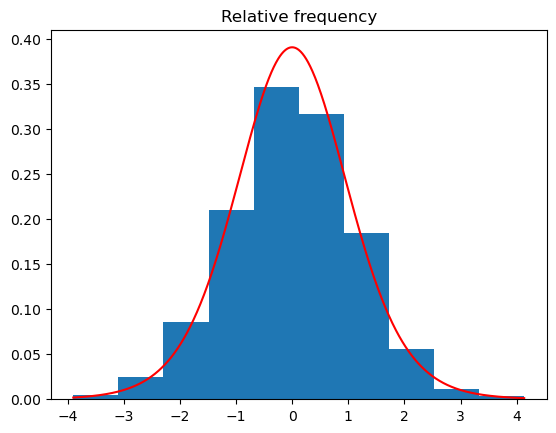

In [20]:
count, bins, ignored  = plt.hist(Z_array, density=True) 
 
x = np.linspace(min(Z_array) ,max(Z_array), 1000) 
pdf = st.t.pdf(x, n-1) 
 
plt.plot(x, pdf, color = "red")  
 
plt.title("Relative frequency")

Axes(0.125,0.11;0.775x0.77)


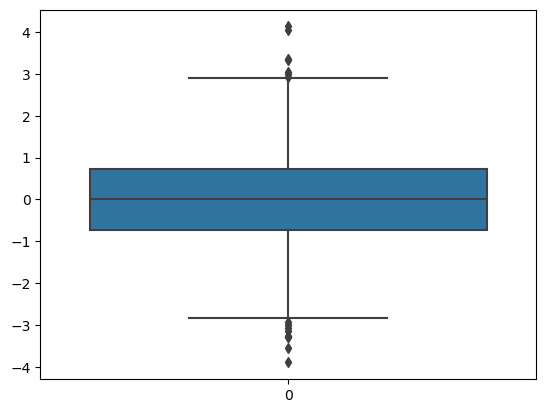

In [21]:
W=sb.boxplot(Z_array) 
print(W)

# 2 ЧАСТЬ

## ЗАДАНИЕ 1


In [11]:
n=13
a=-3
sigma=3
gamma=0.9
K=180
M=1500

def stat_disp():
    count = 0
    for i in range(M):

        s = np.random.normal(loc=a, scale=sigma, size=n)
        diff = np.sum((s - a) ** 2) 

        chi_left, chi_right = st.chi2.interval(gamma, df = n) 

        interval_left = diff / chi_right 
        interval_right = diff / chi_left 

        if interval_left <= sigma**2 <= interval_right: 
            count += 1/M  
    return count
        
print(stat_disp())


0.9066666666666844


In [35]:
disp_list = []
for j in range(K):
    disp_list.append(stat_disp())
    print(disp_list[j])

0.8846666666666831
0.9046666666666843
0.8933333333333503
0.8926666666666836
0.8966666666666838
0.9140000000000181
0.8946666666666837
0.9073333333333511
0.8993333333333506
0.905333333333351
0.9106666666666846
0.8993333333333506
0.8893333333333501
0.8833333333333497
0.8900000000000168
0.8953333333333504
0.8993333333333506
0.9073333333333511
0.9033333333333509
0.8933333333333503
0.8933333333333503
0.9180000000000184
0.9013333333333508
0.8886666666666834
0.8906666666666835
0.8973333333333505
0.9040000000000176
0.8906666666666835
0.9046666666666843
0.8973333333333505
0.9040000000000176
0.8906666666666835
0.905333333333351
0.9093333333333512
0.912000000000018
0.8980000000000172
0.9106666666666846
0.8966666666666838
0.8786666666666828
0.9073333333333511
0.9066666666666844
0.8913333333333502
0.905333333333351
0.8953333333333504
0.9066666666666844
0.9160000000000182
0.9073333333333511
0.8866666666666833
0.900666666666684
0.8986666666666839
0.9073333333333511
0.8960000000000171
0.892000000000016

In [141]:
gamma_mean = np.mean(disp_list) 
gamma_disp = np.var(disp_list)
gamma_std = np.std(disp_list)

(gamma_mean,  gamma_disp, gamma_std)

(0.8998703703703875, 6.931899862826571e-05, 0.008325803182172018)

Axes(0.125,0.11;0.775x0.77)


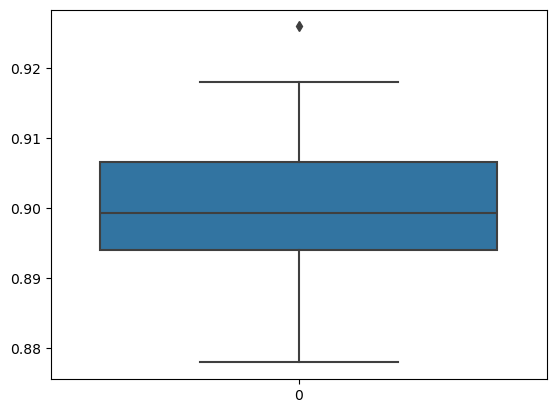

In [37]:
W_box =sb.boxplot(disp_list) 
print(W_box)

In [12]:
count, bins, ignored  = plt.hist(disp_list, density=True, bins="storge") 
x = np.linspace(min(disp_list), max(disp_list), 1000) 
normal_pdf = st.norm.pdf(x, gamma, gamma_std) 

plt.plot(x,  normal_pdf, color = "red")

NameError: name 'disp_list' is not defined

## 3 ЗАДАНИЕ

In [17]:
n=150
def W():
    return sum(np.random.uniform(low=0, high=2, size=3))/3

def S():
    s: np.ndarray = []
    for j in range(n):
        s.append(W())
    return s
    
s = S()  
print(np.mean(s), np.var(s)) 

1.0117597643277525 0.1080758643718054


In [18]:
Mw = (0+2)/2
Dw = ((2-0)**2)/36
Dw = 1/9
print(Mw,Dw)

1.0 0.1111111111111111


In [19]:

def stat_disp_w():
    count = 0
    for i in range(M):

        s = S()
        diff = 0
        for j in s:
            diff += np.sum((j - Mw) ** 2 ) 

        chi_left, chi_right = st.chi2.interval(gamma, df = n) 

        interval_left = diff / chi_right 
        interval_right = diff / chi_left 

        if interval_left <= Dw <= interval_right: 
            count += 1/M  
    return count

stat_disp_w()

0.9293333333333523

In [ ]:
# def samples():
#     result = []
#     for _ in range(M):
#         result.append(S())
#     return result
        
        


# def var_gamma_star_W():
#     W_samples = samples()

#     var_count = 0

#     for sample in W_samples:
#         var_estimate = np.var(sample, ddof = 1)
#         ci_lower, ci_upper = st.chi2.interval(gamma, n-1)

#         interval_lower = (n - 1) * var_estimate / ci_upper
#         interval_upper = (n - 1) * var_estimate / ci_lower
#         if interval_lower < Dw < interval_upper:
#             var_count += 1

#     gamma_star = var_count/M

#     return gamma_star

# print(var_gamma_star_W())

0.9333333333333333


In [140]:
disp_list_w = []
for j in range(K):
    disp_list_w.append(stat_disp_w())
    print(disp_list_w[j])

0.9273333333333522
0.9320000000000191
0.9220000000000186
0.9260000000000188
0.934666666666686
0.9213333333333519
0.9353333333333527
0.9340000000000193
0.9260000000000188
0.9273333333333522
0.9320000000000191
0.9313333333333524
0.9326666666666859
0.9160000000000182
0.9260000000000188
0.9460000000000199
0.9393333333333529
0.9286666666666856
0.9240000000000187
0.9306666666666857
0.9306666666666857
0.9440000000000198
0.9253333333333521
0.9406666666666863
0.9313333333333524
0.9253333333333521
0.9286666666666856
0.9213333333333519
0.9373333333333528
0.9313333333333524
0.9360000000000194
0.9340000000000193
0.9280000000000189
0.9140000000000181
0.9400000000000196
0.9293333333333523
0.9253333333333521
0.934666666666686
0.9193333333333518
0.941333333333353
0.9326666666666859
0.9220000000000186
0.9246666666666854
0.9160000000000182
0.9313333333333524
0.9240000000000187
0.9333333333333526
0.934666666666686
0.9286666666666856
0.9273333333333522
0.9320000000000191
0.9446666666666865
0.93466666666668

In [79]:
gamma_mean = np.mean(disp_list_w) 
gamma_disp = np.var(disp_list_w)
gamma_std = np.std(disp_list_w)
(gamma_mean,  gamma_disp, gamma_std)

(0.9303222222222414, 3.5266543209880524e-05, 0.00593856406969568)

Axes(0.125,0.11;0.775x0.77)


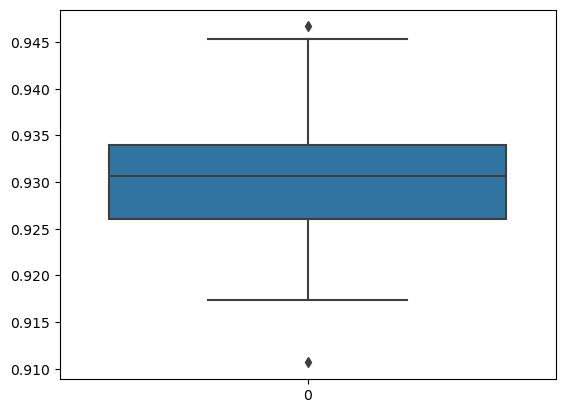

In [80]:
W_box =sb.boxplot(disp_list_w) 
print(W_box)

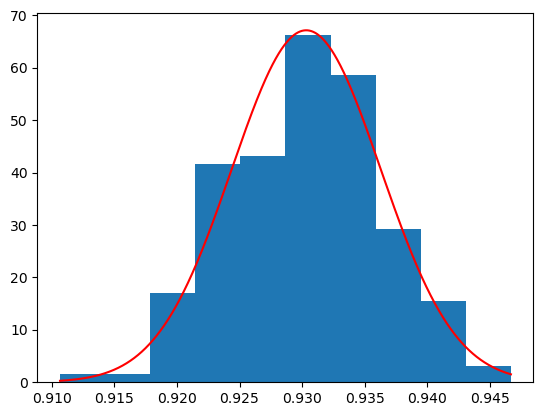

In [81]:
x = np.linspace(min(disp_list_w), max(disp_list_w), 10000) 
normal_pdf = st.norm.pdf(x, gamma_mean, gamma_std) 
 
count, bins, ignored = plt.hist(disp_list_w,density=True) 
plt.plot(x, normal_pdf, color = "red")

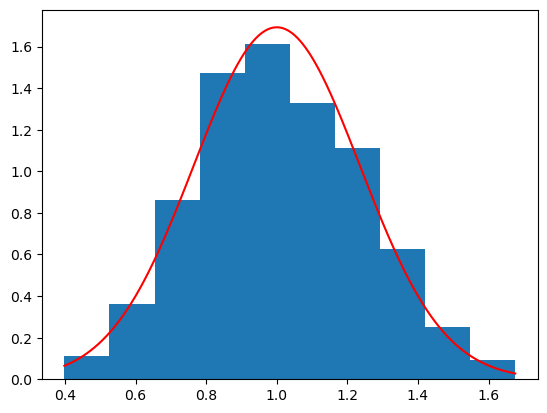

In [25]:
def W():
    return sum(np.random.uniform(low=0, high=2, size=6))/6

def S():
    s: np.ndarray = []
    for j in range(n):
        s.append(W())
    return s


n=500
def S():
    s: np.ndarray = []
    for j in range(n):
        s.append(W())
    return s

list = S()
count, bins, ignored = plt.hist(list,density=True) 

x = np.linspace(min(list), max(list), 10000) 
normal_pdf = st.norm.pdf(x, 1, np.sqrt(1/18) )
plt.plot(x, normal_pdf, color = "red")